![image info](https://ineuron.ai/images/ineuron-logo.png)

# Customer Personality Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* **xyz** company wants to enable and establish a viable business model to expand the customer base. 
* One of the ways to expand the customer base is to introduce a new offering of packages based on the customer personalities. 
* The company wants to segregate the customers so that they can release relevant offers for the respective customers

### **What is Customer personality analysis and segmentation?**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


## 2. Data Collection
- The dataset is downloaded from https://github.com/entbappy/Branching-tutorial/blob/master/marketing_campaign.zip

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**We will set the pandas.set_option to display 100 rows or columns. By default it is 60**

In [2]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

**Import the CSV Data as Pandas DataFrame**

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

**Show Top 5 Records**

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**Shape of the dataset**

In [5]:
df.shape

(2240, 29)

**Summary of the dataset**

In [6]:
# Display summary statistics for a dataframe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Check Datatypes in the dataset**

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 3. EXPLORING DATA

**Let's convert the datetime column to pandas datetime format**

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [9]:
#let's check the datatype
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [10]:
# define numerical & categorical columns
#Let's drop the ID column

columns = [column for column in df.columns if column != "ID"]

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 26 numerical features : ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

We have 2 categorical features : ['Education', 'Marital_Status']


### Feature Information

- **People**

    - **ID:** Customer's unique identifier
    - **Year_Birth:** Customer's birth year
    - **Education:** Customer's education level
    - **Marital_Status:** Customer's marital status
    - **Income:** Customer's yearly household income
    - **Kidhome:** Number of children in customer's household
    - **Teenhome:** Number of teenagers in customer's household
    - **Dt_Customer:** Date of customer's enrollment with the company
    - **Recency:** Number of days since customer's last purchase
    - **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

- **Products**

    - **MntWines:** Amount spent on wine in last 2 years
    - **MntFruits:** Amount spent on fruits in last 2 years
    - **MntMeatProducts:** Amount spent on meat in last 2 years
    - **MntFishProducts:** Amount spent on fish in last 2 years
    - **MntSweetProducts:** Amount spent on sweets in last 2 years
    - **MntGoldProds:** Amount spent on gold in last 2 years

- **Promotion**

    - **NumDealsPurchases:** Number of purchases made with a discount
    - **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

- **Place**

    - **NumWebPurchases:** Number of purchases made through the company’s website
    - **NumCatalogPurchases:** Number of purchases made using a catalogue
    - **NumStorePurchases:** Number of purchases made directly in stores
    - **NumWebVisitsMonth:** Number of visits to company’s website in the last month

In [11]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [12]:
df[categorical_features[0]].value_counts().count()

5

In [13]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: Education, dtype: float64
---------------------------
Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: Marital_Status, dtype: float64
---------------------------


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

In [14]:
len(numeric_features)

26

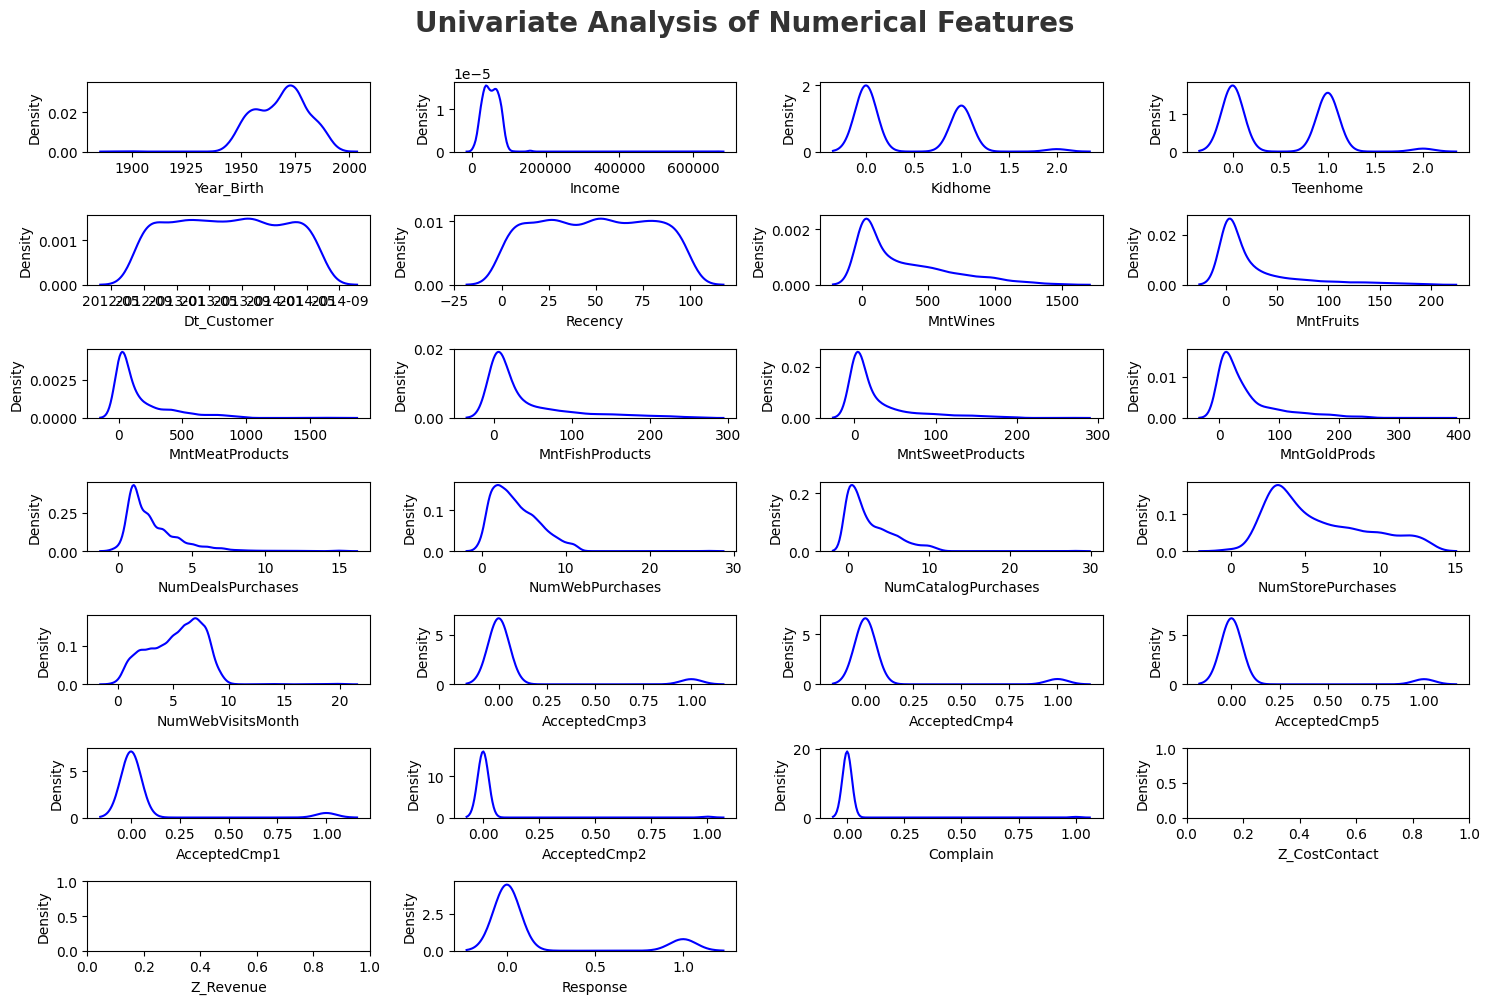

In [15]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

### Categorical Features

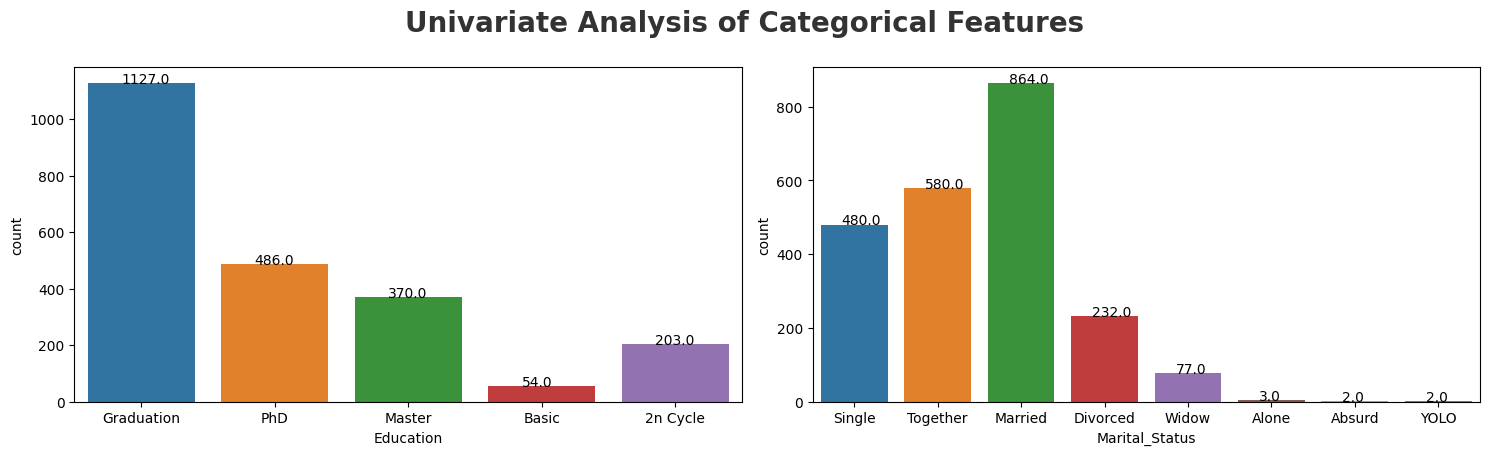

In [16]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(x=df[categorical_features[i]])
    if df[categorical_features[i]].value_counts().count() <10:
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

**Report**
- For column **``Education``**
    - Most of the Customers are falling into **Graduation** category.
    - Respectively, **PhD, Master Education, Basic and *2n Cycle** are also present.
    
    _2nCycle_ -  Multidisciplinary degree programmes are second cycle degree programmes in which the teaching system meets the requirements of two different classes
    
- For column **```Maritial_Status```**
    - For about **864** customers are married. 
    - **Together, single, divorced, widow** are noticeable where **Alone, Absurd and YOLO** categories are very less.

### Count of features based on years

In [17]:
df1 = df.copy()
df1["Year"] = df1.Dt_Customer.dt.year
customer_joined_per_year = df1.groupby(by="Year", axis=0)[['ID']].count()
customer_joined_per_year.columns = ['CUSTOMER_JOINED']
customer_joined_per_year

,CUSTOMER_JOINED
Year,
2012,494
2013,1189
2014,557


**Report**
- No of Customers Joined in a year -
    - In year **2012**, total 494 customers joined.
    - In year **2013**, total 1189 customers joined.
    - In year **2014**, total 557 customers joined.

- By this report, we can say that, most number of customers have joined in the year **2013**

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [18]:
correlation_dataframe = df[(list(df.columns)[1:])].corr()
correlation_dataframe =  correlation_dataframe.reset_index()
columns = [column for column in correlation_dataframe.columns]
columns.remove('index')
columns.insert(0,'Column_name')
correlation_dataframe.columns = columns
correlation_dataframe



def get_correlation_dataframe(correlation_dataframe):
    
    for row in correlation_dataframe.index:
        negative_correlation_list = []
        positive_correlation_list = []
        primary_column_name = correlation_dataframe['Column_name'][row]

        for column in correlation_dataframe.columns[1:]:
           
            column_to_check_correlation = column
            if primary_column_name != column_to_check_correlation:
                corr_value = correlation_dataframe[column_to_check_correlation][row]
                if corr_value > 0:
                    positive_correlation_list.append(column_to_check_correlation)
                    # print(f"{primary_column_name} has a positive correlation with {column_to_check_correlation}. The value is : {corr_value} \n -------------------------")

                else:
                    negative_correlation_list.append(column_to_check_correlation)
                    # print(f"{primary_column_name} has a negative correlation with {column_to_check_correlation}. The value is : {corr_value} \n -------------------------")

                
            # print(f"corr value of {primary_column_name} and {column_to_check_correlation} is -- {corr_value}")
            
        print(f"{primary_column_name} has positive correlation with -- {positive_correlation_list}")
        print(f"{primary_column_name} has negative correlation with {negative_correlation_list} \n")
        
        
        
        
get_correlation_dataframe(correlation_dataframe=correlation_dataframe)
        

Year_Birth has positive correlation with -- ['Kidhome', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp5', 'Response']
Year_Birth has negative correlation with ['Income', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue'] 

Income has positive correlation with -- ['Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']
Income has negative correlation with ['Year_Birth', 'Kidhome', 'Recency', 'NumDealsPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'Complain', 'Z_CostContact', 'Z_Revenue'] 

Kidhome has positive correlation with -- ['Year_Birth', 'Recen

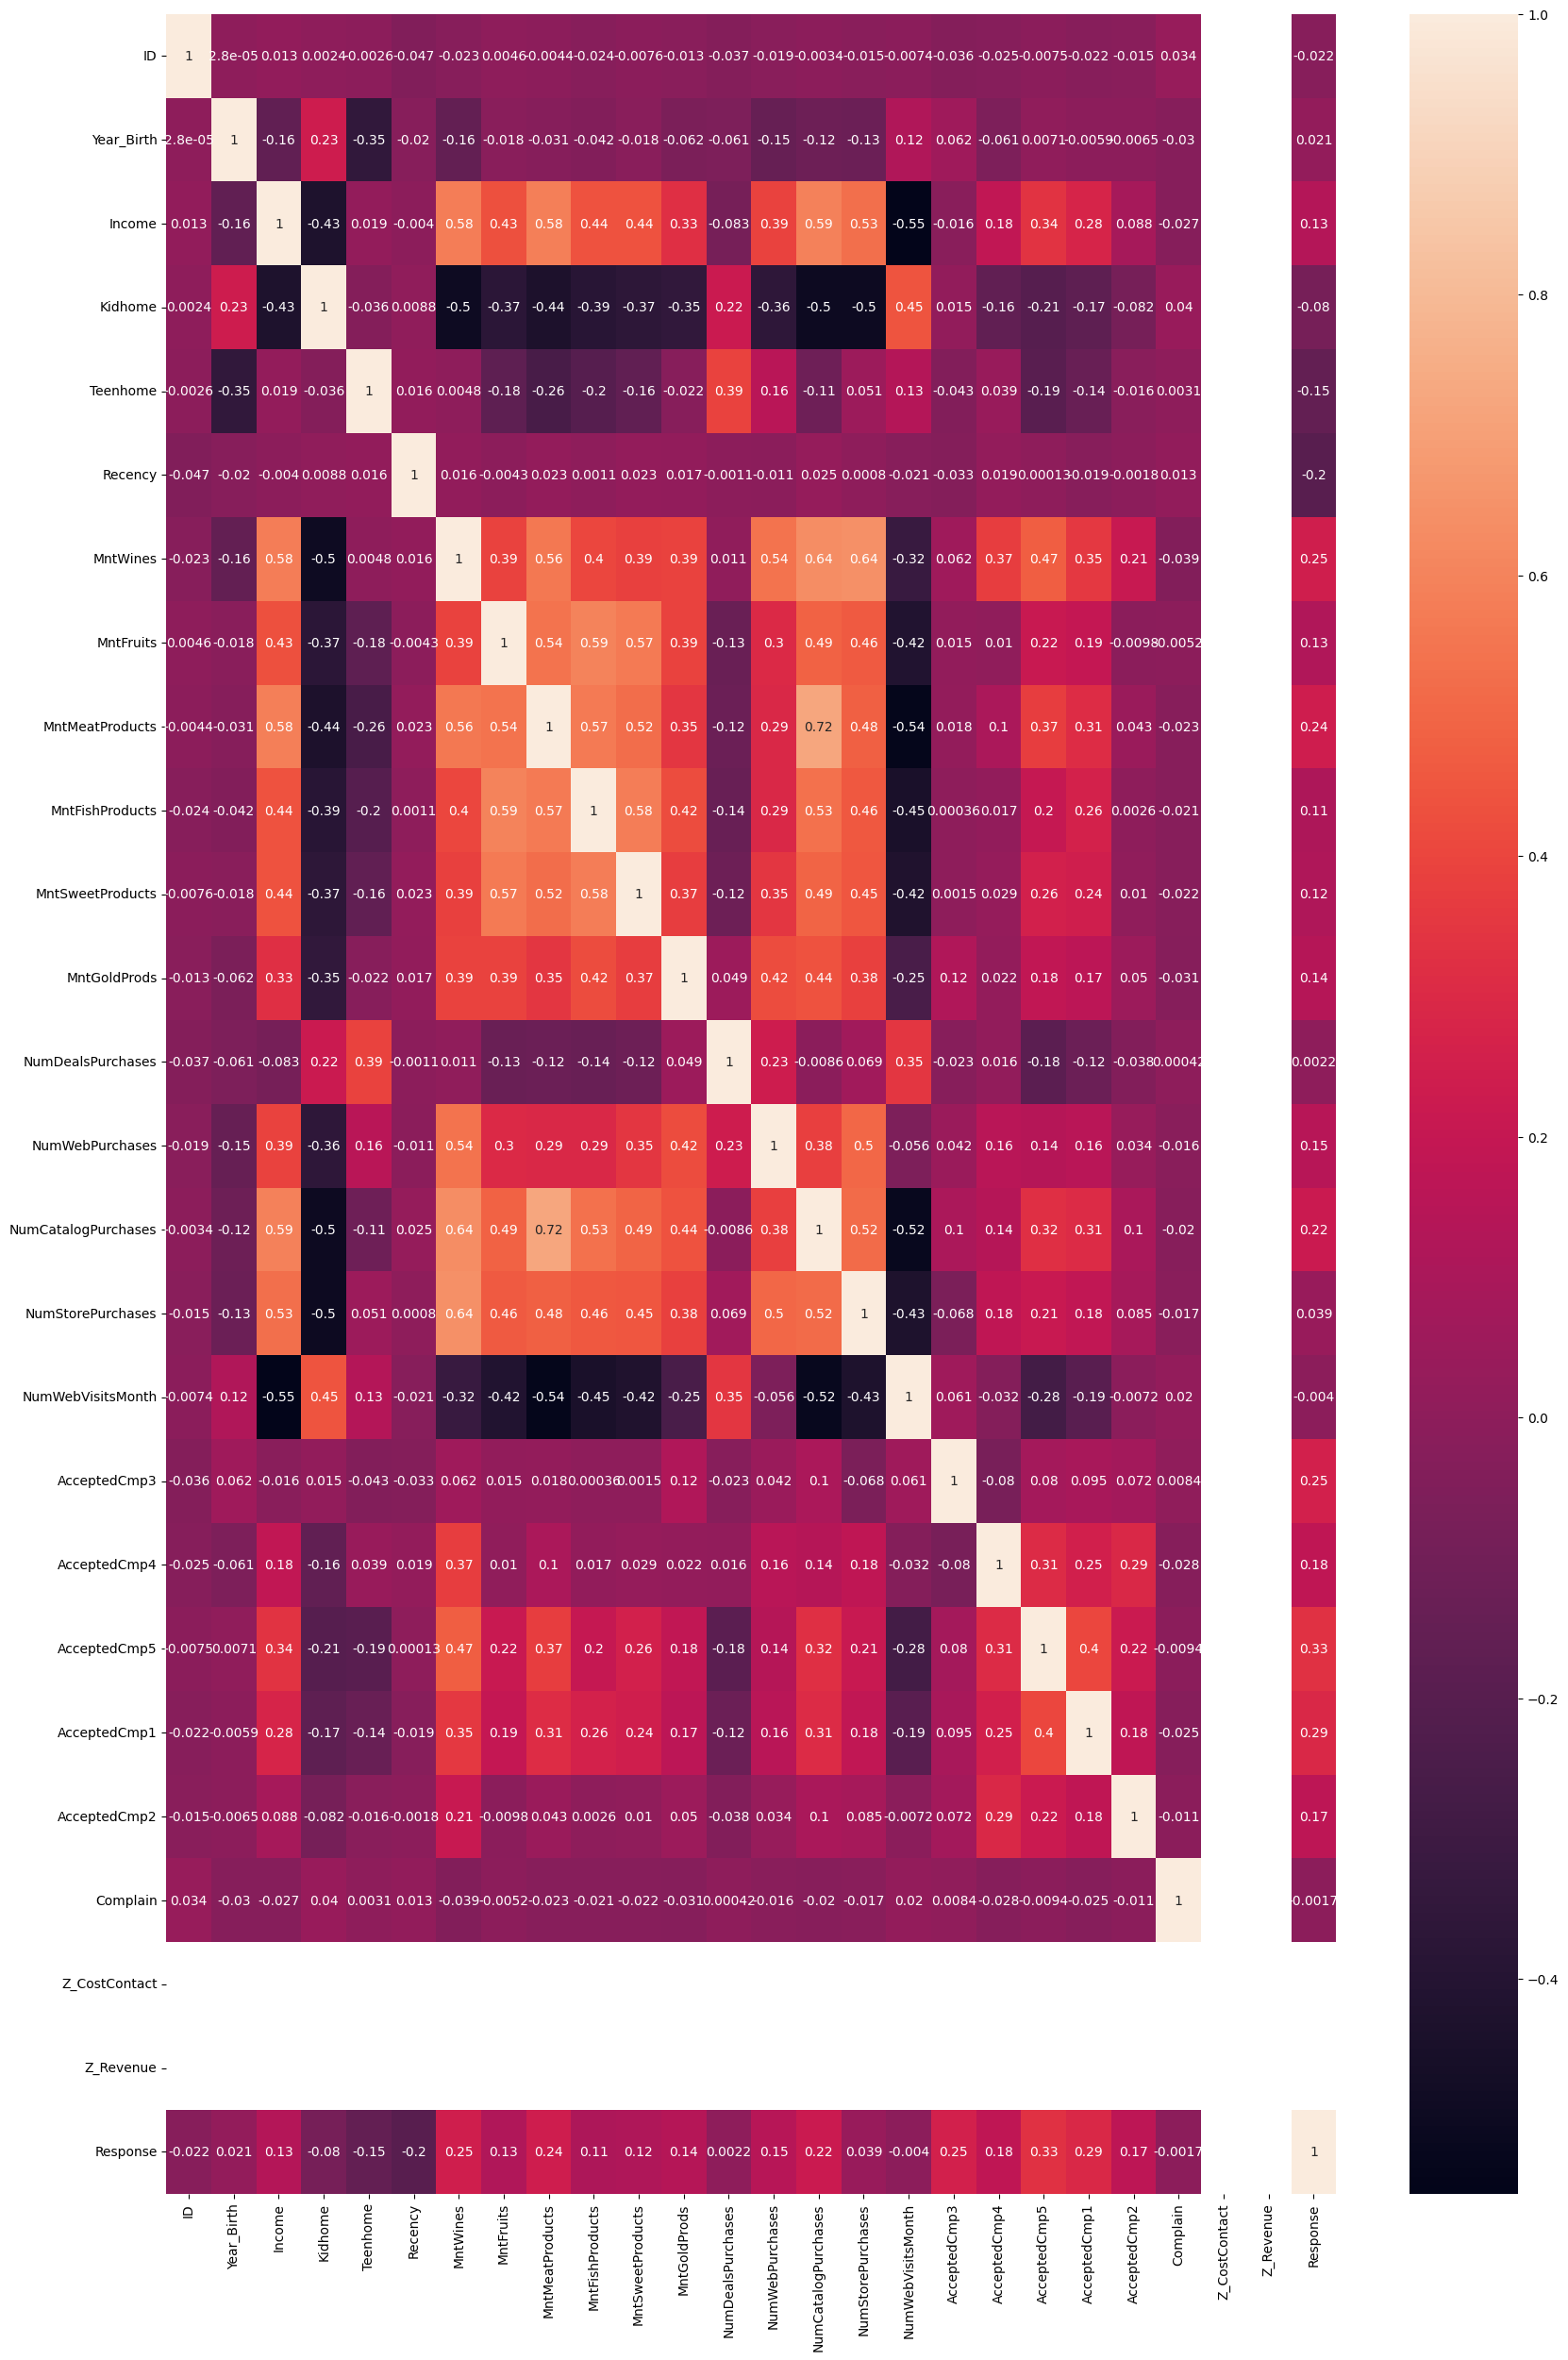

In [19]:
plt.figure(figsize = (20,30))
sns.heatmap(df.corr(), annot=True)
plt.show()

<AxesSubplot: >

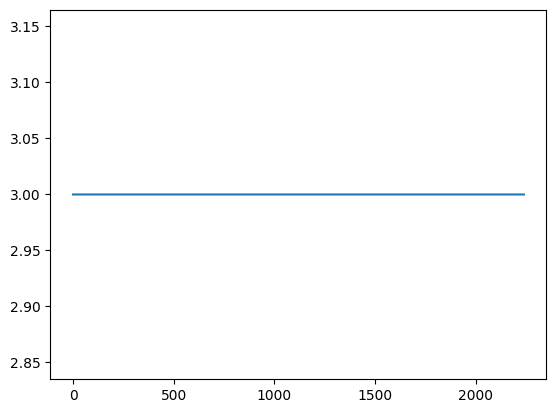

In [20]:
df.Z_CostContact.plot()

<AxesSubplot: >

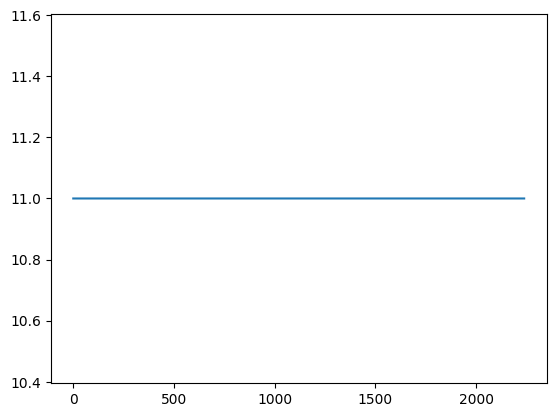

In [21]:
df.Z_Revenue.plot()

**As we can see**
- The column ```Z_CostContact```, ```Z_Revenue``` does have constant values. As this columns does not have any varience, we can drop this column

In [22]:
df = df.drop(columns=['Z_CostContact','Z_Revenue'])
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

**let's check the correlation again**

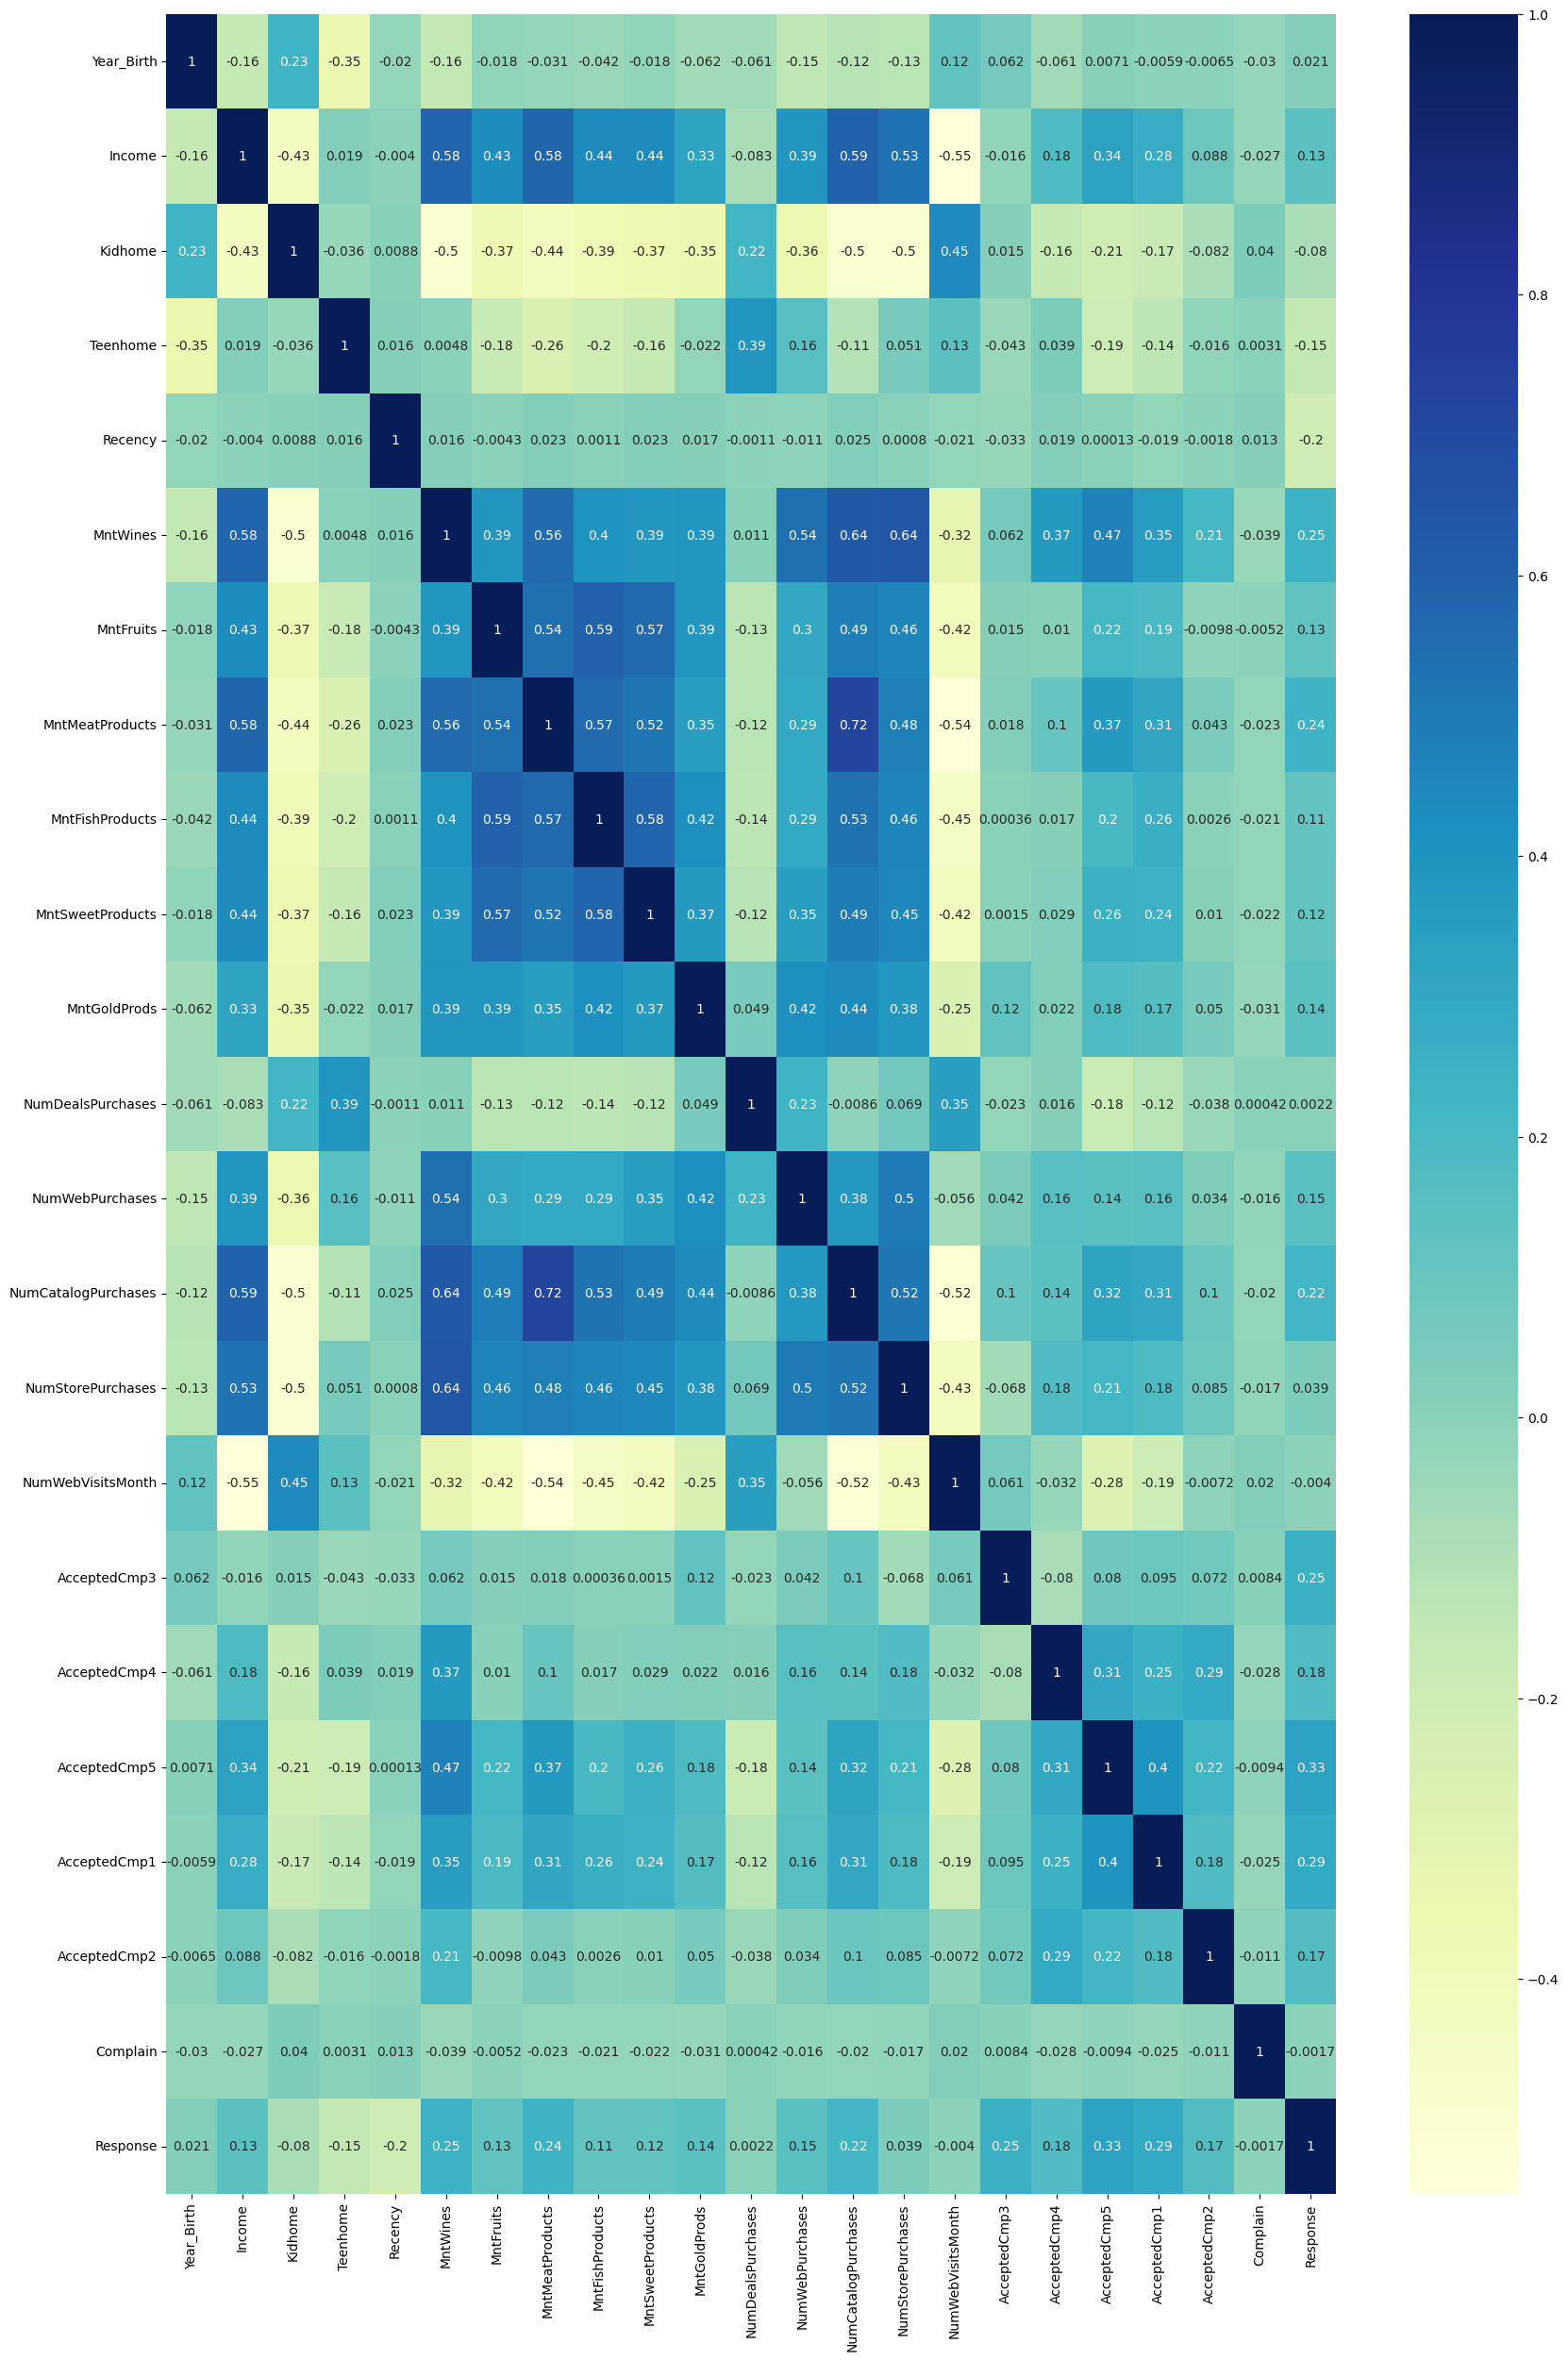

In [23]:
plt.figure(figsize = (20,30))
num_features = numeric_features.copy()

num_features.remove('Z_CostContact')    ## Previously these columns were removed from df, so removing from the num_features too.
num_features.remove('Z_Revenue')
sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

### Checking Null Values

In [24]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

**We can see there is null values in Income column, We can impute the null values in feature engineering steps.**

In [25]:
numeric_features.remove('Z_CostContact')
numeric_features.remove('Z_Revenue')
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Names of continues features :',continuous_features)

Names of continues features : ['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


## Initial Analysis Report

* **There are missing values in the Income column.**
* **The ID column can be deleted because each row has unique values.**
* **There is no such target feature, so we can do clustering.**


## 4. Visualization

### 4.1 Do Men or Women, who are most in count?

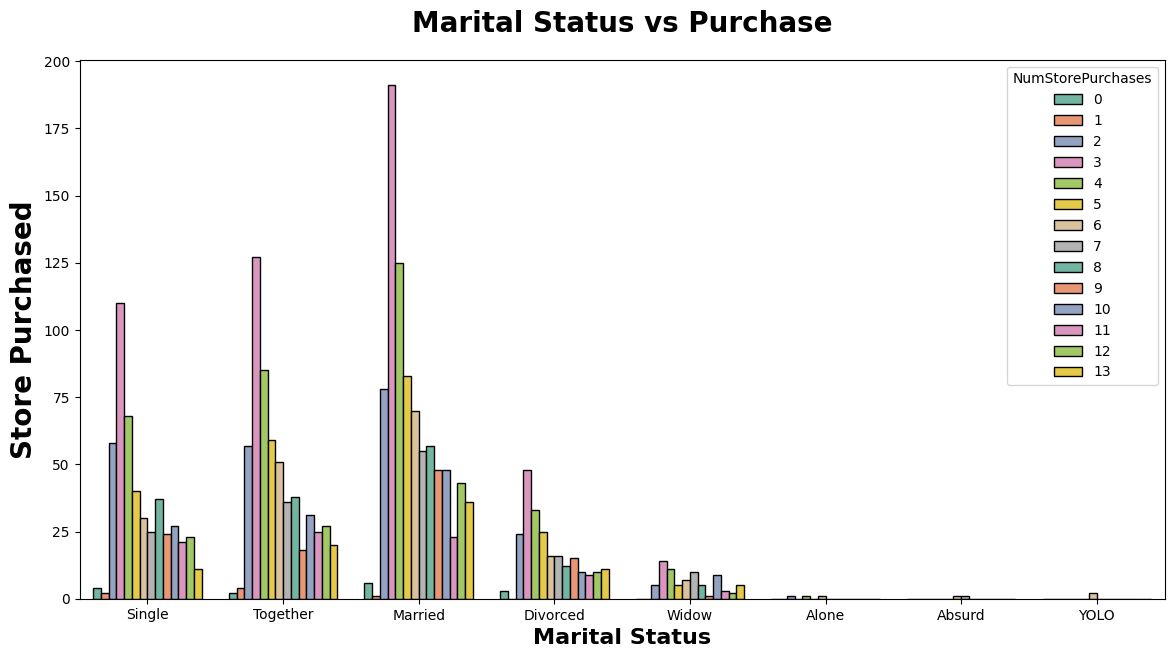

In [31]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Marital_Status",hue="NumStorePurchases", data=df1,ec = "black",palette="Set2")
plt.title("Marital Status vs Purchase", weight="bold",fontsize=20, pad=20)
plt.ylabel("Store Purchased", weight="bold", fontsize=20)
plt.xlabel("Marital Status", weight="bold", fontsize=16)
plt.show()

**Report:**
* As per the Chart, **Married** Customers bought more store products.
* **Divorces, Widow, Alone, Absurd and YOLO** category people baught very less.


**Report:**
* As per the Chart Male and Female customers who are Single has Purchased more than Divorced and Married and UnMarried.
* 33.18% of Single Customers, 24% of UnMarried Customers
* Followed by approx 13% of Divorced and Married Customers

In [32]:
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

print(f"Newest customer's enrolment date is {max(dates)}")
print(f"Oldest customer's enrolment date is {min(dates)}")

Newest customer's enrolment date is 2014-06-29
Oldest customer's enrolment date is 2012-07-30


**Report**
* Executives have purchased the Product more than other designation people.
* This feature has very good impact on target variable.

In [36]:
from datetime import datetime

## The following code creates features that would be helpful to describe the profile of the customer 
#  recodes the customer's education level to numeric form (0: high-school, 1: diploma, 2: bachelors, 3: masters, and 4: doctorates)
#  creates a new field to store the household size

df_copy = df.copy()

##  creating a new field to store the Age of the customer
df_copy['Age']=2022-df_copy['Year_Birth']   

###  recoding the customer's education level to numeric form (0: high-school, 1: diploma, 2: bachelors, 3: masters, and 4: doctorates)
df_copy["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)  

#  recoding the customer's marital status to numeric form (0: not living with a partner, 1: living with a partner) 
df_copy['Marital_Status'].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0},inplace=True) 

#  creating a new field to store the number of children in the household
df_copy['Children']=df_copy['Kidhome']+df_copy['Teenhome']

#creating Family_Size
df_copy['Family_Size']=df_copy['Marital_Status']+df_copy['Children']+1



#  creating a new field to store the total spending of the customer
df_copy['Total_Spending']=df_copy["MntWines"]+ df_copy["MntFruits"]+ df_copy["MntMeatProducts"]+ df_copy["MntFishProducts"]+ df_copy["MntSweetProducts"]+ df_copy["MntGoldProds"]

#creating columns to store the proportions of each product
df_copy['Prop_Wines']=df_copy["MntWines"]/df_copy["Total_Spending"]
df_copy['Prop_Fruits']=df_copy["MntFruits"]/df_copy["Total_Spending"]
df_copy['Prop_MeatProducts']=df_copy["MntMeatProducts"]/df_copy["Total_Spending"]
df_copy['Prop_FishProducts']=df_copy["MntFishProducts"]/df_copy["Total_Spending"]
df_copy['Prop_SweetProducts']=df_copy["MntSweetProducts"]/df_copy["Total_Spending"]
df_copy['Prop_GoldProds']=df_copy["MntGoldProds"]/df_copy["Total_Spending"]

## The following code works out how long the customer has been with the company and store the total number of promotions the customers responded to
df_copy['Dt_Customer']=pd.to_datetime(df_copy['Dt_Customer'])
today=datetime.today()
df_copy['Days_as_Customer']=(today-df_copy['Dt_Customer']).dt.days
df_copy['Offers_Responded_To']=df_copy['AcceptedCmp1']+df_copy['AcceptedCmp2']+df_copy['AcceptedCmp3']+df_copy['AcceptedCmp4']+df_copy['AcceptedCmp5']+df_copy['Response']

In [37]:
df_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Family_Size,Total_Spending,Prop_Wines,Prop_Fruits,Prop_MeatProducts,Prop_FishProducts,Prop_SweetProducts,Prop_GoldProds,Days_as_Customer,Offers_Responded_To
0,5524,1957,2,0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0,1,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,3677,1
1,2174,1954,2,0,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,2,3,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,3127,0
2,4141,1965,2,1,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,0,2,776,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,3326,0
3,6182,1984,2,1,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,1,3,53,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,3153,0
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,1,3,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,3175,0


In [87]:
#setting plotting options

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#cce0ff","figure.facecolor":"#cce0ff"})
sns.set_context("poster",font_scale = .7)


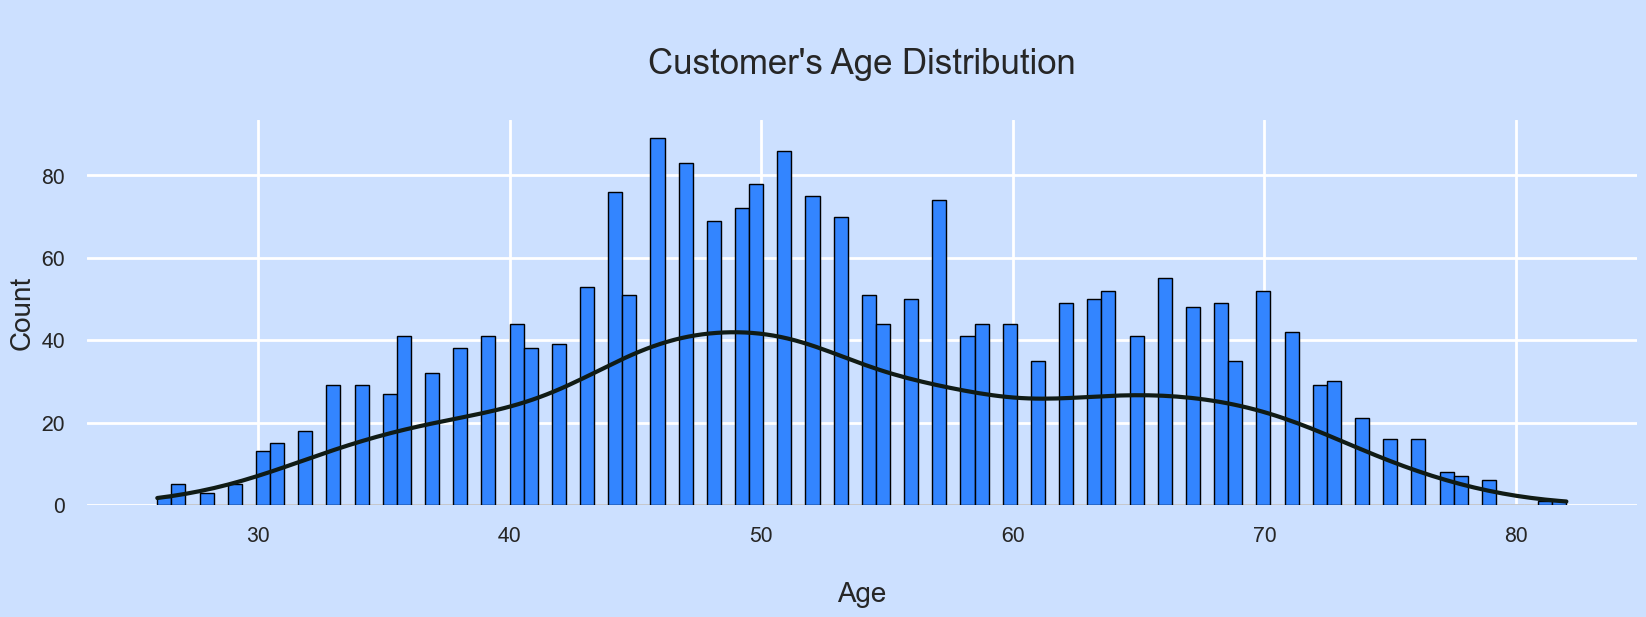

In [112]:

plt.subplots(figsize=(20, 5))
plt.title("Let's have a look on the distribution of customer's age :", weight="bold",fontsize=20, pad=20)

p = sns.histplot(df_copy["Age"],color="#3385ff",kde=True,bins=100,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

**reports:**

* We can see it's a normal distribution of customer's age.
* We can see there's some outliers in the distribution. So we can remove the outliers from the Age column.


**As we can see most of the customers' age is 80 or less. So we can filter the data by age <90**

Let's have a look again on the distribution of customer's age :


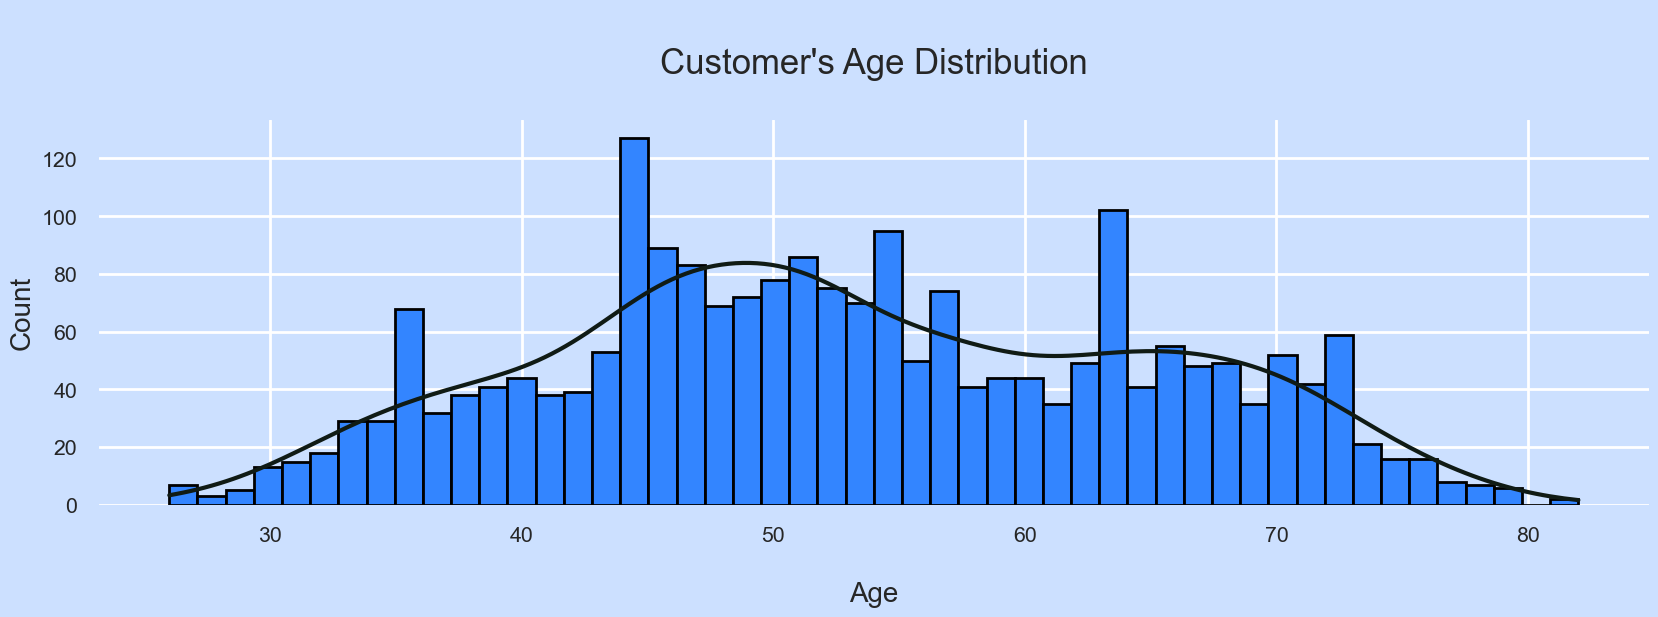

In [90]:
df_copy = df_copy[df_copy["Age"] < 90]

#let's plot now
print(f"Let's have a look again on the distribution of customer's age :")

plt.subplots(figsize=(20, 5))
p = sns.histplot(df_copy["Age"],color="#3385ff",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()


**report**
* We can see it's a normal distribution of customer's age.
* Most of the customers are from 43 to 57.


In [54]:
df_copy.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Children',
       'Family_Size', 'Total_Spending', 'Prop_Wines', 'Prop_Fruits',
       'Prop_MeatProducts', 'Prop_FishProducts', 'Prop_SweetProducts',
       'Prop_GoldProds', 'Days_as_Customer', 'Offers_Responded_To'],
      dtype='object')

Let's have a look on the distribution of customer's income and spending :


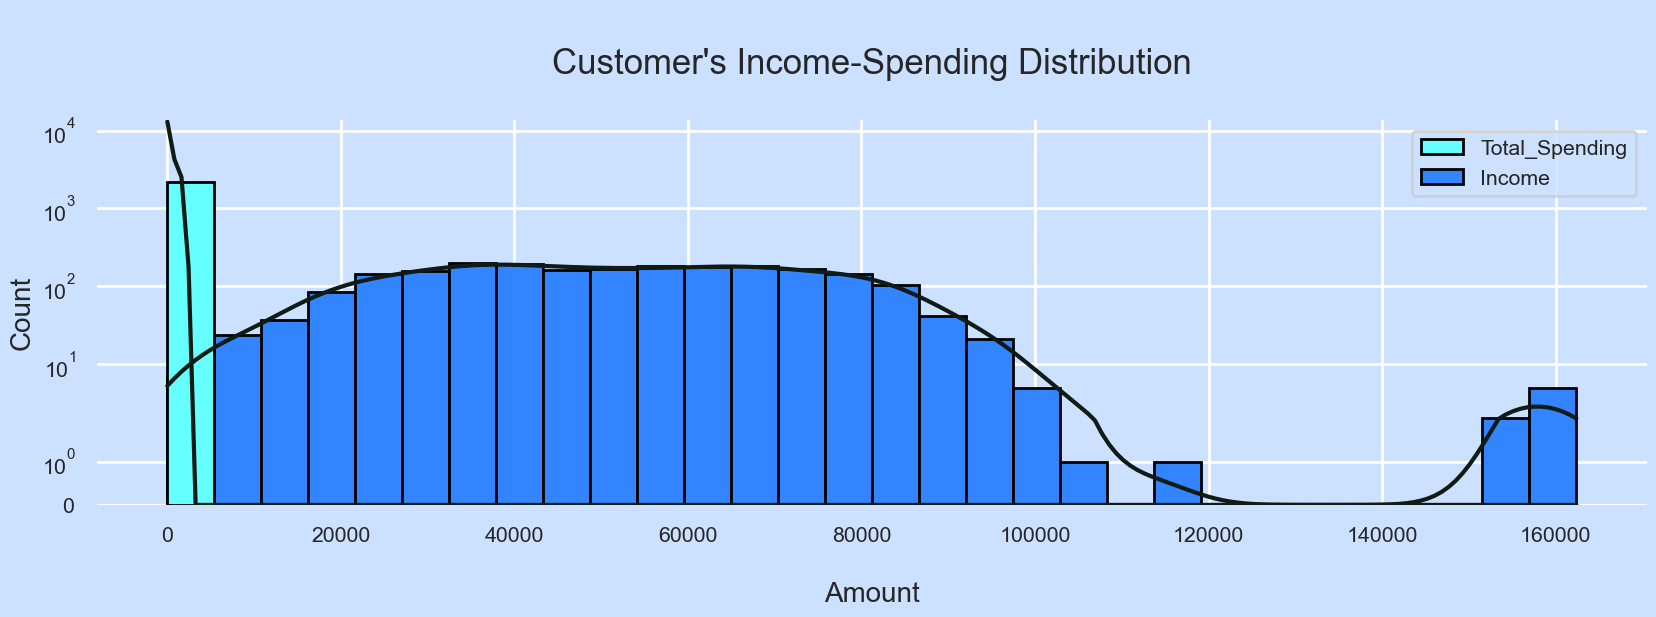

In [92]:
print(f"Let's have a look on the distribution of customer's income and spending :")
plt.subplots(figsize=(20, 5))
p = sns.histplot(df_copy[["Total_Spending","Income"]],palette=["#66ffff","#3385ff"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.lines[1].set_color("#101B15")
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

- **reports**

    - Income Column Does have some outliers which are seen after 60,00,00, so we can filter them out

Let's have a look again on the distribution of customer's income and spending :


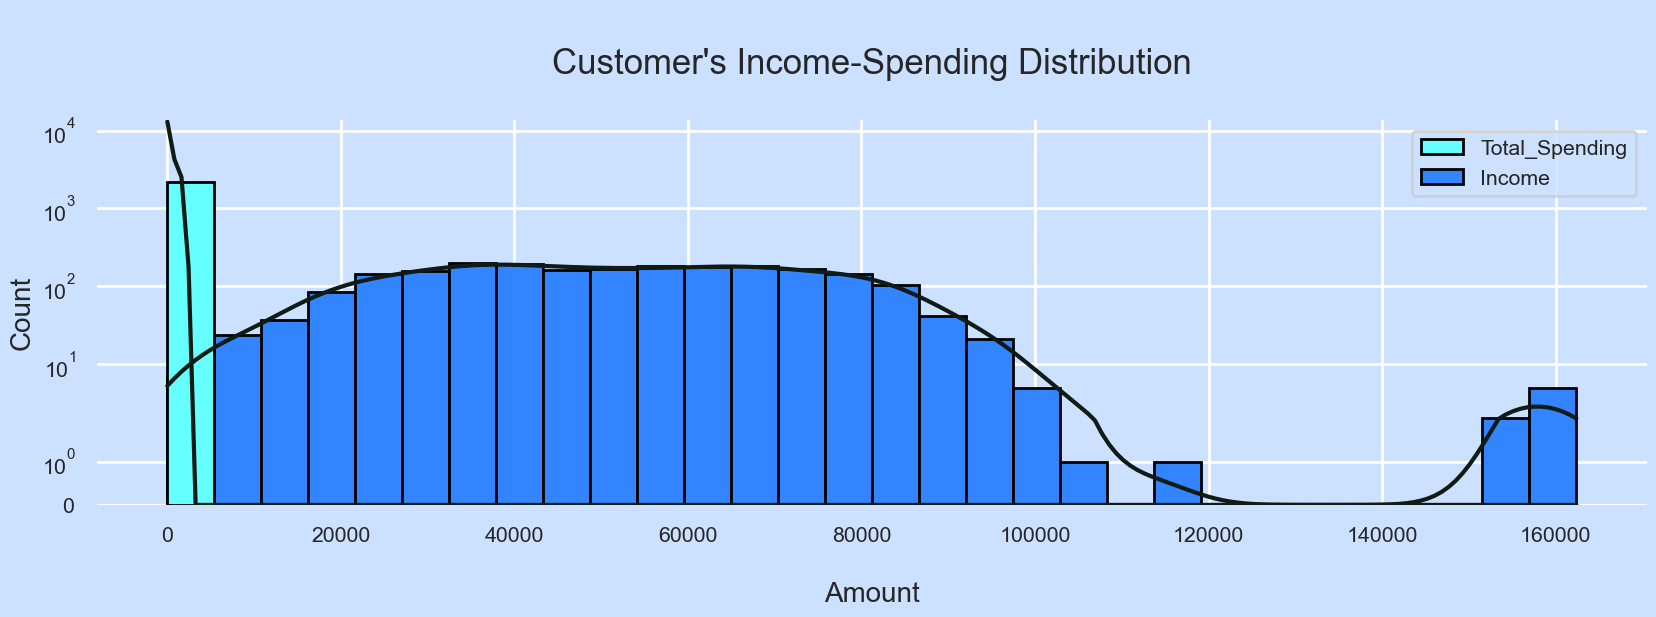

In [93]:
df_copy = df_copy[df_copy["Income"] < 600000]

#now, let's plot again
print(f"Let's have a look again on the distribution of customer's income and spending :")
plt.subplots(figsize=(20, 5))
p = sns.histplot(df_copy[["Total_Spending","Income"]],palette=["#66ffff","#3385ff"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.lines[1].set_color("#101B15")
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

- Most of the customers income range is in between 20000 to 80000
- Bust almost all customers spend very few portion of their income.

Let's have a look on the customer's education :


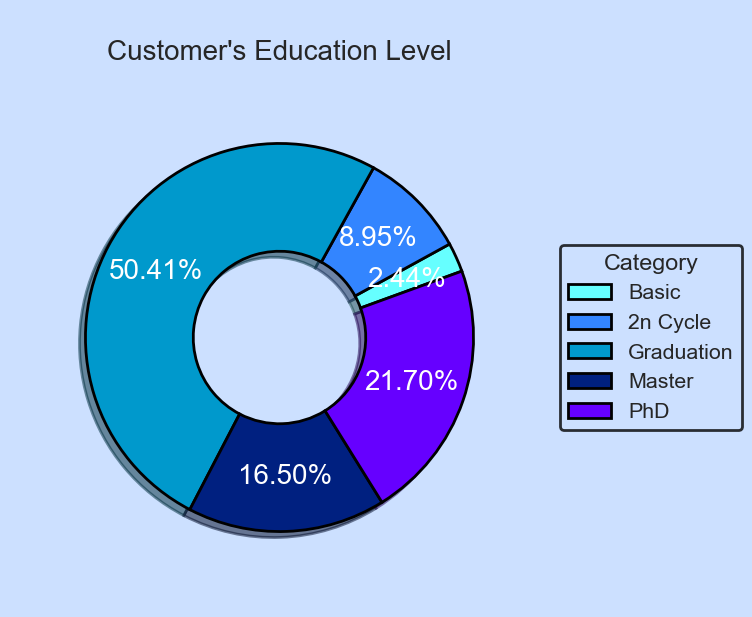

In [99]:
print(f"Let's have a look on the customer's education :")
plt.subplots(figsize=(7, 7))

labels = "Basic","2n Cycle", "Graduation", "Master", "PhD"
size = 0.5

wedges, texts, autotexts = plt.pie([df_copy["Education"].value_counts()[0],
                                    df_copy["Education"].value_counts()[1],
                                    df_copy["Education"].value_counts()[2],
                                    df_copy["Education"].value_counts()[3],
                                    df_copy["Education"].value_counts()[4]],
                                    explode = (0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#66ffff","#3385ff","#0099cc","#002080","#6600ff"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 2),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20)
plt.show()

**Insights:**

- Customers have three education levels : Basic, 2n Cycle, Graduation, Master, PhD
- 50.41% have completed graduation, 16.50% are doing masters, 21.70% are persuing PhD, 8.95% are in 2n Cycle study and 2.44% have done basic education 

In [77]:
df_copy.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Children',
       'Family_Size', 'Total_Spending', 'Prop_Wines', 'Prop_Fruits',
       'Prop_MeatProducts', 'Prop_FishProducts', 'Prop_SweetProducts',
       'Prop_GoldProds', 'Days_as_Customer', 'Offers_Responded_To'],
      dtype='object')

Let's have a look on the distribution of customer's income and spending on basis of education level :


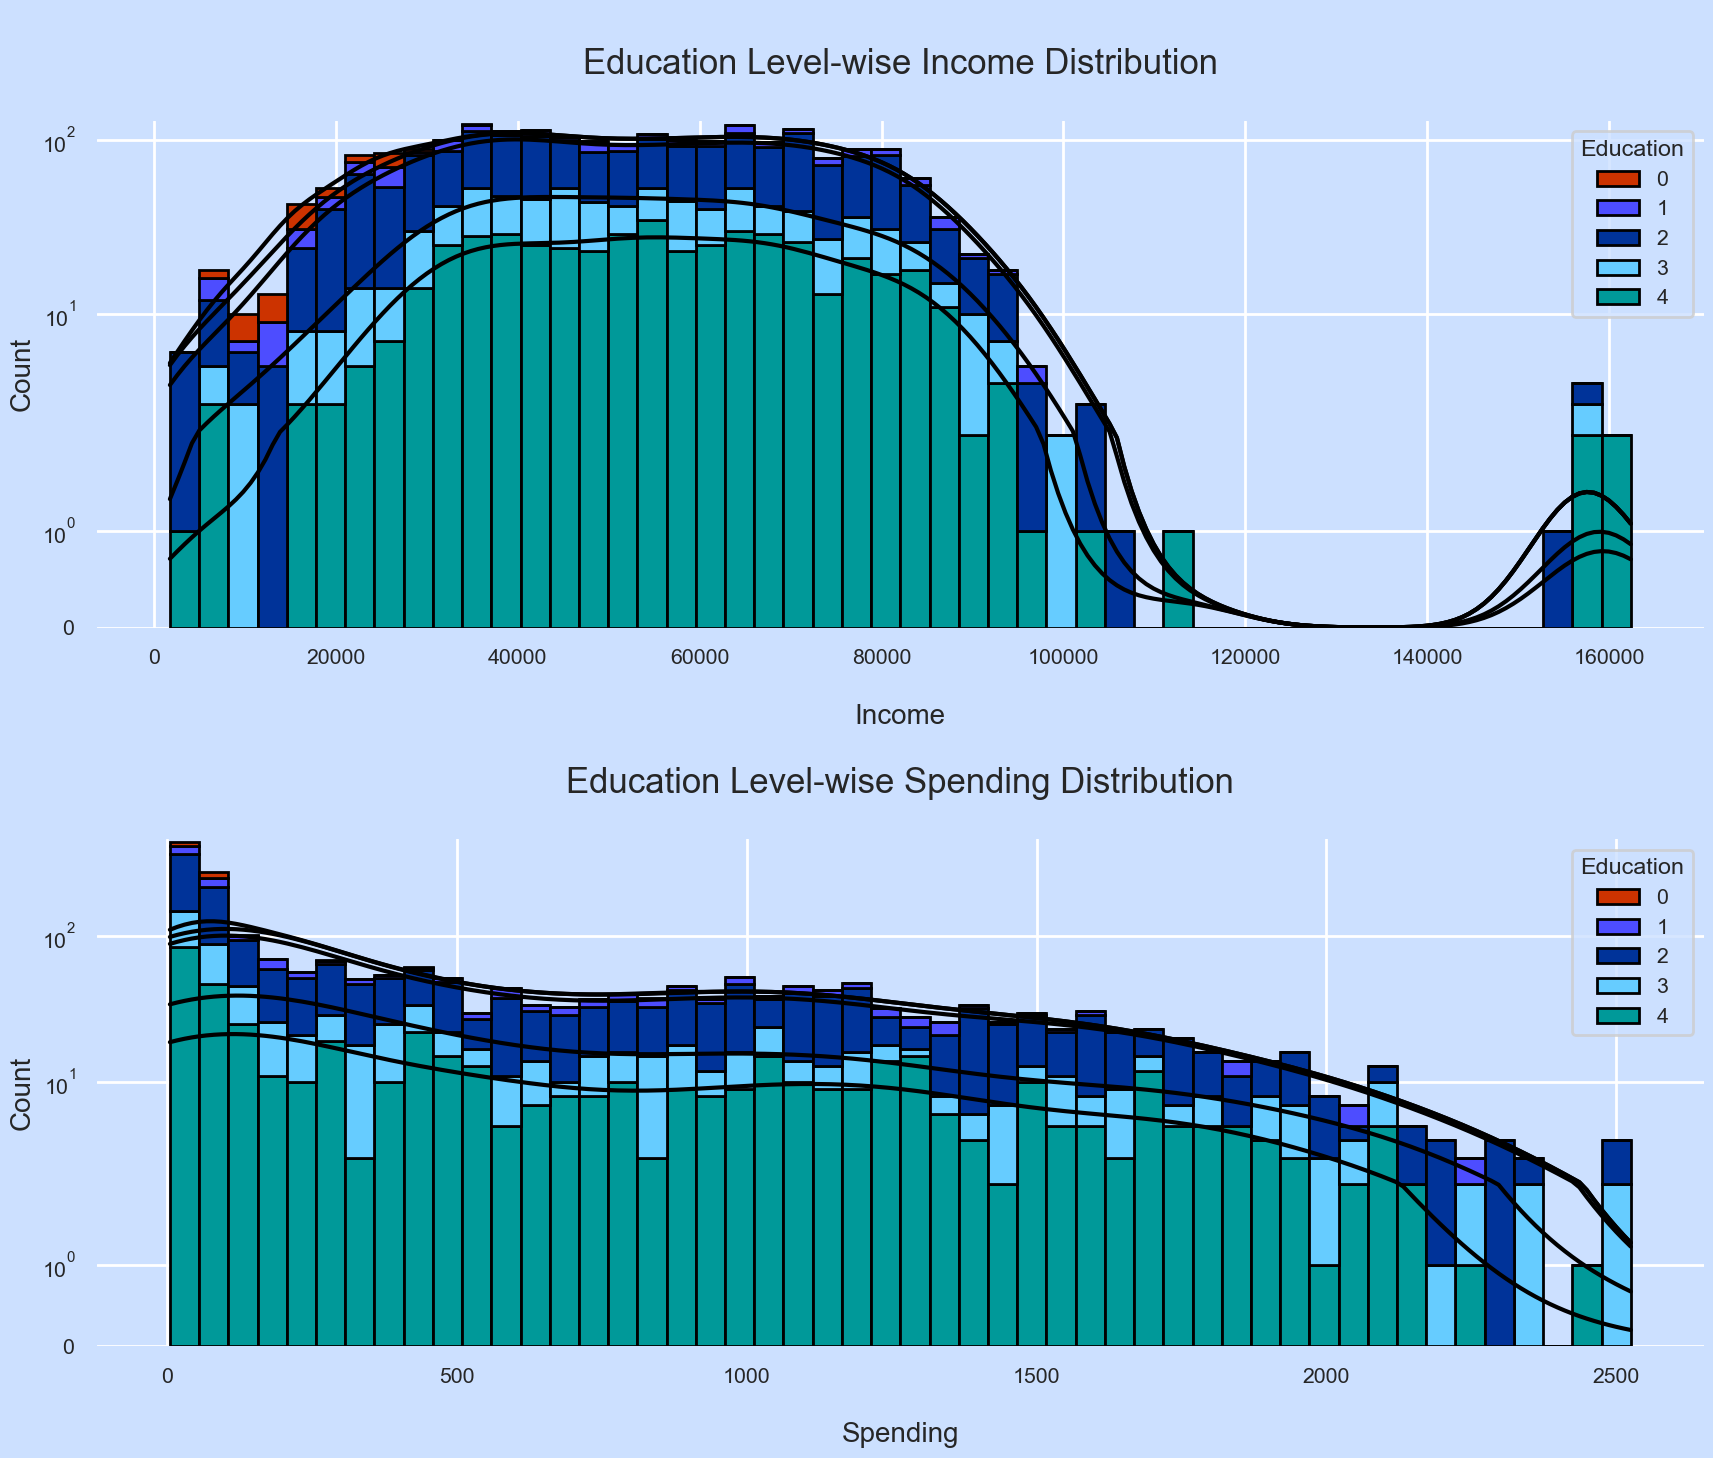

In [108]:
print(f"Let's have a look on the distribution of customer's income and spending on basis of education level :")

_, axes = plt.subplots(2,1,figsize=(20,16),sharex=False)
plt.tight_layout(pad=7.0)

colors = ["#cc2900","#0000ff","#66ffff", "#009999","#99ff66"]
colors2 = ["#cc3300","#4d4dff","#003399","#66ccff","#009999"]
sns.histplot(data=df_copy,x="Income",hue="Education",multiple="stack",palette=colors2,ax=axes[0],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
axes[0].lines[0].set_color("000000")
axes[0].lines[1].set_color("000000")
axes[0].lines[2].set_color("000000")
axes[0].lines[3].set_color("000000")
axes[0].lines[4].set_color("000000")

axes[0].set_yscale("symlog")
axes[0].set_title("\nEducation Level-wise Income Distribution\n",fontsize=25)
axes[0].set_ylabel("Count",fontsize=20)
axes[0].set_xlabel("\nIncome",fontsize=20)

sns.histplot(data=df_copy,x="Total_Spending",hue="Education",multiple="stack",palette=colors2,ax=axes[1],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
axes[1].lines[0].set_color("000000")
axes[1].lines[1].set_color("000000")
axes[1].lines[2].set_color("000000")
axes[1].lines[3].set_color("000000")
axes[1].lines[4].set_color("000000")
axes[1].set_yscale("symlog")
axes[1].set_title("\nEducation Level-wise Spending Distribution\n",fontsize=25)
axes[1].set_ylabel("Count",fontsize=20)
axes[1].set_xlabel("\nSpending",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

- Most of the undergraduate level customer's income range is in between 10000 to 80000 and spending in between 0 to 1400.
- Most of the graduate level customer's income range is in between 20000 to 85000 and spending in between 0 to 2000.
- Most of the postgraduate level customer's income range is in between 30000 to 80000 and spending in between 0 to 2000.

In [109]:
df_copy.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Children',
       'Family_Size', 'Total_Spending', 'Prop_Wines', 'Prop_Fruits',
       'Prop_MeatProducts', 'Prop_FishProducts', 'Prop_SweetProducts',
       'Prop_GoldProds', 'Days_as_Customer', 'Offers_Responded_To'],
      dtype='object')

Let's have a look on the distribution of customer's children :


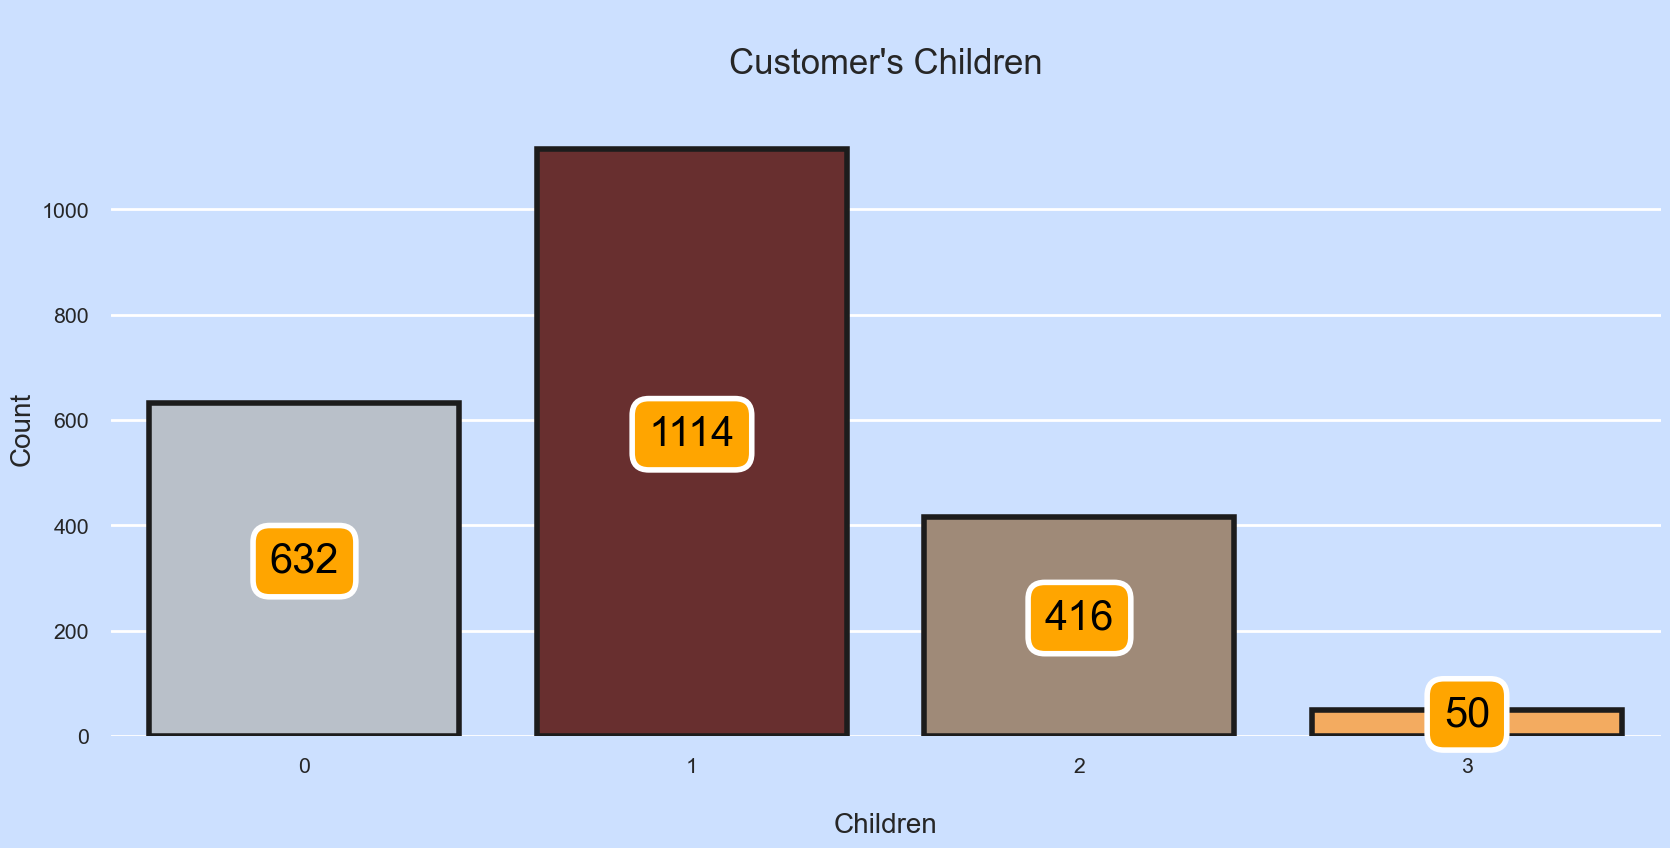

In [110]:
print(f"Let's have a look on the distribution of customer's children :")
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=df_copy["Children"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Children\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nChildren",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Report:**

- 632 customers have no child.
- Most of the customers have one child.
- 416 customers have two child.
- 50 customers have three child.